# PyTorch Tutorial
Presented by: Parsa Toopchinezhad   
From: Razi AI Assosication

This video is for:  
- People familiar with other neural network libraries (Tensorflow, Keras, ...)
- Those who have a theoretical understading of neural networks
- Anyone interested in learning the fundamentals of PyTorch

<font color='red'>This video is NOT for</font>:
- Those who have just started studying machine learning
- People unfamiliar with basic neural network concepts

# Part 1: Installing

In [2]:
# anaconda: conda install pytorch torchvision -c pytorch
# pip: pip3 install torch torchvision

#### Installing CUDA version of PyTorch:

In [3]:
# anaconda: conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
# pip: pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

(For more information about installing the different versions of PyTorch visit: https://pytorch.org/get-started/locally/)

# Part 2: Tensors

![title](tensor.png)

## 2.1: Tensor Creation

In [4]:
import torch

a = 3
print(type(a))
a_tensor = torch.tensor(a)
print(type(a_tensor))
print(a_tensor, a_tensor.shape)

b = [100,30,70,20]
b_tensor = torch.tensor(b, dtype=torch.int16)
print(b_tensor, b_tensor.shape)

c = [[10,20,30],[90,80,70],[50,40,50]]
c_tensor = torch.tensor(c, dtype=torch.float32)
c_tensor[0][0] = 1
c_tensor[1][2] = 3
print(c_tensor, c_tensor.shape)

import numpy as np
d = np.array([[20,10,0],[40,50,60]])
d_tensor = torch.from_numpy(d)
print(d_tensor, d_tensor.shape)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'int'>
<class 'torch.Tensor'>
tensor(3) torch.Size([])
tensor([100,  30,  70,  20], dtype=torch.int16) torch.Size([4])
tensor([[ 1., 20., 30.],
        [90., 80.,  3.],
        [50., 40., 50.]]) torch.Size([3, 3])
tensor([[20, 10,  0],
        [40, 50, 60]]) torch.Size([2, 3])


## 2.2: Tensor Operations

In [5]:
x = torch.rand(2,2)
print("x =",x)
y = torch.rand(2,2)
print("y =",y)
z = x+y
print("z =",z)
m = torch.matmul(x,y)
print("m =",m)

x = tensor([[0.5451, 0.3465],
        [0.2941, 0.5081]])
y = tensor([[0.6957, 0.4415],
        [0.3979, 0.5195]])
z = tensor([[1.2408, 0.7880],
        [0.6920, 1.0276]])
m = tensor([[0.5171, 0.4207],
        [0.4068, 0.3938]])


## 2.3: Changing Dimensions

In [6]:
a = torch.ones(1, 20)
print(a.shape)
print(a)
b = a.squeeze()
print(b.shape)
print(b)

torch.Size([1, 20])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.]])
torch.Size([20])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])


## 2.4: Tensors on GPU

In [7]:
#By default, new tensors are created on the CPU
if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device='cuda')
    print(gpu_rand)
else:
    print('Your system does not have a cuda device')

Your system does not have a cuda device


# Part 3: Datasets
## 3.1: Built-in Datasets

In [8]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [9]:
print(training_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [10]:
first_data = training_data[0]
image = first_data[0]
label = first_data[1]
print("image:",image)
print("-----------")
print("label:",label)

image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

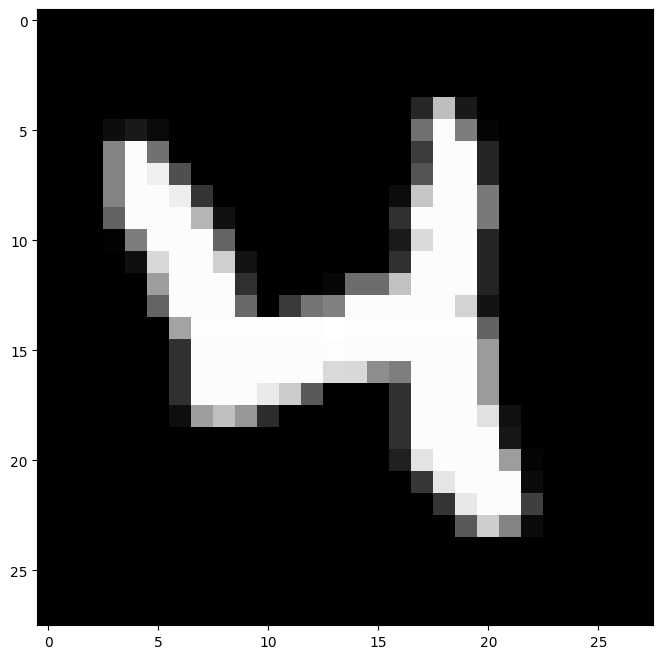

In [11]:
def show_mnist_image(index):
    figure = plt.figure(figsize=(8, 8))
    img, label = training_data[index]
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()
show_mnist_image(20)

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 3.2: Custom Dataset
![title](dataset.png)

In [13]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Part 4: Neural Networks


## 4.1: Simple MLP
![title](nn-1.png)
## 4.1.1: Creating Model

In [14]:
from torch import nn

class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
model = SimpleMLP().to(device)

Using mps device


## 4.1.2: Visualizing Model

In [16]:
print(model)

SimpleMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


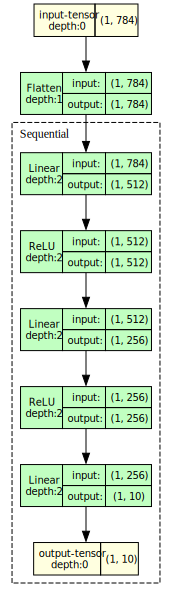

In [17]:
# pip install graphviz
# pip install torchview
from torchview import draw_graph

model_graph = draw_graph(model, input_size=((1,28*28)), expand_nested=True)
model_graph.visual_graph

## 4.1.3: Training Model

In [20]:
# hyperparameters
lr = 0.001
epochs = 16
batch_size = 64

loss_fn = nn.CrossEntropyLoss() # MSELoss(), NLLLoss(), ...
optimizer = torch.optim.SGD(model.parameters(), lr=lr) # ADAM(), RMSprop(), ASGD(), ...

In [19]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        


        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            # or can save model

            
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 16
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305880  [   64/60000]
loss: 2.303192  [ 6464/60000]
loss: 2.293383  [12864/60000]
loss: 2.292958  [19264/60000]
loss: 2.286663  [25664/60000]
loss: 2.283122  [32064/60000]
loss: 2.279227  [38464/60000]
loss: 2.277785  [44864/60000]
loss: 2.265760  [51264/60000]
loss: 2.268363  [57664/60000]
Test Error: 
 Accuracy: 45.0%, Avg loss: 2.262982 

Epoch 2
-------------------------------
loss: 2.277845  [   64/60000]
loss: 2.270237  [ 6464/60000]
loss: 2.243546  [12864/60000]
loss: 2.253132  [19264/60000]
loss: 2.246380  [25664/60000]
loss: 2.237814  [32064/60000]
loss: 2.234810  [38464/60000]
loss: 2.233442  [44864/60000]
loss: 2.215478  [51264/60000]
loss: 2.222697  [57664/60000]
Test Error: 
 Accuracy: 57.7%, Avg loss: 2.205882 

Epoch 3
-------------------------------
loss: 2.209868  [   64/60000]
loss: 2.212878  [ 6464/60000]
loss: 2.218611  [12864/60000]
loss: 2.183313  [19264/60000]
loss: 2.185660  [25664/60000]
loss: 2.174339  [32064/600

## 4.1.4: Saving and Loading

In [138]:
print(model.state_dict())
torch.save(model.state_dict(), 'model_name.pth')
del model
new_model = SimpleMLP()
model.load_state_dict(torch.load('model_name.pth'))

OrderedDict([('linear_relu_stack.0.weight', tensor([[ 0.0138, -0.0227, -0.0179,  ..., -0.0210, -0.0102,  0.0241],
        [ 0.0062,  0.0036,  0.0166,  ...,  0.0212,  0.0235,  0.0266],
        [-0.0164,  0.0309,  0.0033,  ...,  0.0252,  0.0249, -0.0335],
        ...,
        [-0.0329, -0.0058, -0.0195,  ...,  0.0059,  0.0144, -0.0167],
        [-0.0157,  0.0023,  0.0165,  ...,  0.0144, -0.0315,  0.0314],
        [-0.0130,  0.0256, -0.0178,  ..., -0.0221,  0.0011, -0.0109]])), ('linear_relu_stack.0.bias', tensor([-3.9707e-03, -1.0505e-02,  1.9044e-02, -8.2308e-03, -2.1574e-02,
         3.2927e-03, -1.7606e-02,  3.2187e-02, -2.7105e-02, -2.0130e-02,
        -2.2808e-02,  1.0003e-02,  1.6283e-02,  3.6579e-02,  3.4071e-02,
         3.5603e-02,  1.8711e-02,  4.2462e-02,  1.9967e-02,  3.7114e-02,
         2.6528e-02, -3.3595e-02,  3.3931e-02,  4.3950e-04,  2.5270e-02,
        -2.5932e-02,  1.7372e-02,  1.5185e-03,  2.4198e-02,  1.6180e-02,
        -2.8721e-02,  1.9140e-02, -8.5489e-04, -3.452

NameError: name 'model' is not defined

## 4.2: LeNet-5
![title](nn-2.png)

Lenet-5 Architecture
- Input: 28* 28 *1 image
- Convolution layer 1: padding size of 2 + 6 (5*5) kernels + ReLU
- Pooling layer 1: (2*2) kernel size with stride of 2
- Convolution layer 2: no padding + 16 (5*5) kernels + ReLU
- Pooling layer 2: (2*2) kernel size with stride of 2
- Fully connected layer 1: 120 neurons + ReLU
- Fully connected layer 2: 84 neurons + ReLU
- Fully connected layer 3: 10 neurons


## 4.2.1: Creating Model

In [21]:
import torch.nn.functional as F


class LeNet5(nn.Module):


    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 4.2.2 Training Model

In [140]:
import numpy as np
import os
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size = 64

model = LeNet5().to(device)
optimizer = SGD(model.parameters(), lr=1e-1)
loss_fn = CrossEntropyLoss()
all_epoch = 10
prev_acc = 0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300150  [   64/60000]
loss: 1.574601  [ 6464/60000]
loss: 0.449133  [12864/60000]
loss: 0.247814  [19264/60000]
loss: 0.198080  [25664/60000]
loss: 0.132241  [32064/60000]
loss: 0.105165  [38464/60000]
loss: 0.047472  [44864/60000]
loss: 0.107544  [51264/60000]
loss: 0.100076  [57664/60000]
Test Error: 
 Accuracy: 94.7%, Avg loss: 0.161795 

Epoch 2
-------------------------------
loss: 0.126053  [   64/60000]
loss: 0.086659  [ 6464/60000]
loss: 0.020102  [12864/60000]
loss: 0.004464  [19264/60000]
loss: 0.060968  [25664/60000]
loss: 0.019025  [32064/60000]
loss: 0.065969  [38464/60000]
loss: 0.055770  [44864/60000]
loss: 0.015216  [51264/60000]
loss: 0.124853  [57664/60000]
Test Error: 
 Accuracy: 98.0%, Avg loss: 0.063943 

Epoch 3
-------------------------------
loss: 0.064606  [   64/60000]
loss: 0.118353  [ 6464/60000]
loss: 0.022987  [12864/60000]
loss: 0.033026  [19264/60000]
loss: 0.016336  [25664/60000]
loss: 0.004408  [32064/600

# 5: Transfer Learning
![title](transfer.webp)
## 5.1: ResNet for MNIST

In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
from torchvision import transforms
import time
from torch.utils.data import DataLoader
import inspect

class MnistResNet(nn.Module):
  def __init__(self, in_channels=1):
    super(MnistResNet, self).__init__()

    # Load a pretrained resnet model from torchvision.models in Pytorch
    self.model = models.resnet50(weights='IMAGENET1K_V1')

    # Change the input layer to take Grayscale image, instead of RGB images. 
    # Hence in_channels is set as 1 or 3 respectively
    # original definition of the first layer on the ResNet class
    # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.model.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
    
    # Change the output layer to output 10 classes instead of 1000 classes
    num_ftrs = self.model.fc.in_features
    self.model.fc = nn.Linear(num_ftrs, 10)

  def forward(self, x):
    return self.model(x)


my_resnet = MnistResNet()



In [74]:
input = torch.randn((16,1,244,244))
output = my_resnet(input)
print(output.shape)

print(my_resnet)

torch.Size([16, 10])
MnistResNet(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample):

In [78]:
model = MnistResNet()
loss_function = nn.CrossEntropyLoss() # your loss function, cross entropy works well for multi-class problems
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.411254  [   64/60000]
loss: 0.241505  [ 6464/60000]
loss: 0.516178  [12864/60000]
loss: 0.120766  [19264/60000]
loss: 0.164617  [25664/60000]


KeyboardInterrupt: 

## 5.2: Freezing Layers

In [105]:
model = models.mobilenet_v2(weights = "IMAGENET1K_V1")

for param in model.parameters():
    param.requires_grad = False
    
for i in range(15, 19):
    for param in model.features[i].parameters():
        param.requires_grad = True